## LOADING LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## LOADING AND DATA PREPROCESSING

In [2]:
mnist = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [3]:
xtrain = xtrain.reshape(-1,28,28,1)
xtest = xtest.reshape(-1,28,28,1)

## Model Building

In [4]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\msaak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8871 - loss: 0.6697 - val_accuracy: 0.9814 - val_loss: 0.0630
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9812 - loss: 0.0628 - val_accuracy: 0.9822 - val_loss: 0.0580
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9859 - loss: 0.0454 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9847 - val_loss: 0.0519
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9822 - val_loss: 0.0747


## Evaluation

In [7]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0882
Test Accuracy: 0.9822


## Visualization

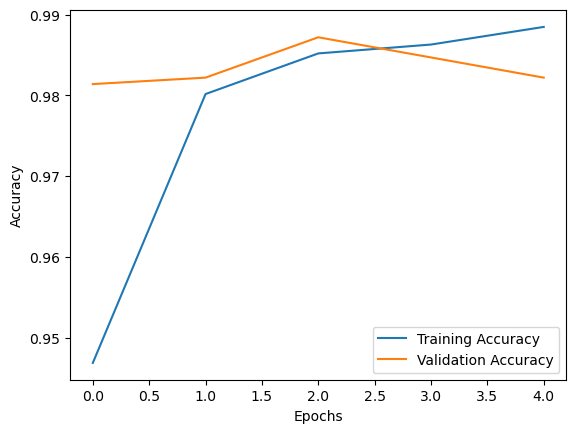

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Prediction

In [9]:
predictions = model.predict(xtest[:5])
print("Predicted labels:", predictions.argmax(axis=1))
print("Actual labels:", ytest[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted labels: [7 2 1 0 4]
Actual labels: [7 2 1 0 4]
